In [3]:
import numpy
from matplotlib import pyplot

''' Atomic fractional coordiantes x/a, y/b, and z/c
from (1988 Macromolecules Immiczi and Iannelil) 
Comments indicate bonding. '''
C1 = numpy.array([[-0.0727, 0.2291, 0.2004],  # 0: 1
                  [-0.0765, 0.1592, 0.2788],  # 1: 0 2
                  [-0.1021, 0.1602, 0.5098],  # 2: 1 4
                  [-0.3087, 0.0589, 0.4941],  # 3: 4
                  [-0.1146, 0.0928, 0.6057],  # 4: 2 3 5
                  [-0.1044, 0.0854, 0.8428],  # 5: 4 7
                  [ 0.2775, 0.0797, 0.9260],  # 6: 7
                  [ 0.0872, 0.1156, 0.9730],  # 7: 5 6 8
                  [ 0.1026, 0.1221, 1.2109]]) # 8: 7
''' Angle between c vector and x-axis. '''
beta = 99.5 * numpy.pi / 180.0
''' Columns of unit_cell are the a, b, and c cell vectors. '''
unit_cell = numpy.array([[6.63,  0.00, 6.50*numpy.cos(beta)],
                         [0.00, 20.78, 0.0],
                         [0.00,  0.00, 6.50*numpy.sin(beta)]])


def apply_space_group(C1):
    ''' Edited symmetry operations to make figure match - not checked '''
    C2, C3, C4 = C1.copy(), C1.copy(), C1.copy()

    C2[:,0] = -C2[:,0]
    C2[:,1] = -C2[:,1]
    C2[:,2] = -C2[:,2] + 1.0

    C3[:,0] =  C3[:,0] - 0.5
    C3[:,1] =  C3[:,1] - 0.5
    C3[:,2] =  C3[:,2]

    C4[:,0] =  C4[:,0] - 0.5
    C4[:,1] = -C4[:,1] + 0.5
    C4[:,2] = -C4[:,2] + 1.0
    return C1, C2, C3, C4  

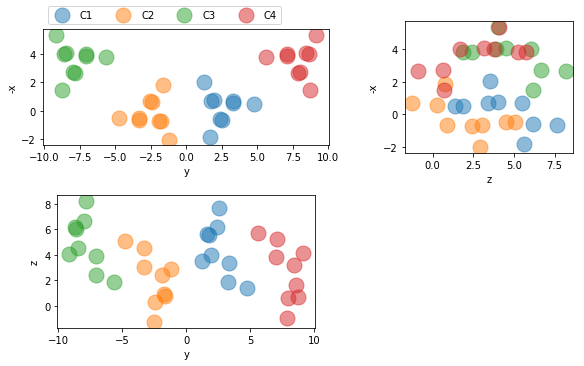

In [4]:
x = numpy.vstack([numpy.dot(x, unit_cell) for x in apply_space_group(C1)])
lx, ly = unit_cell[0,0], unit_cell[1,1]

figure = pyplot.figure(figsize=(9,5))
ax = pyplot.subplot(221)
ax.plot(x[:9,1],    -x[:9,0],    '.', ms=30, alpha=0.5, label='C1')
ax.plot(x[9:18,1],  -x[9:18,0],  '.', ms=30, alpha=0.5, label='C2')
ax.plot(x[18:27,1], -x[18:27,0], '.', ms=30, alpha=0.5, label='C3')
ax.plot(x[27:36,1], -x[27:36,0], '.', ms=30, alpha=0.5, label='C4')
ax.set_xlabel('y')
ax.set_ylabel('-x')
ax.set_aspect('equal')
pyplot.legend(ncol=4, bbox_to_anchor=(0,1), loc='lower left')

ax = pyplot.subplot(222)
ax.plot(x[:9,2],    -x[:9,0],    '.', ms=30, alpha=0.5, label='C1')
ax.plot(x[9:18,2],  -x[9:18,0],  '.', ms=30, alpha=0.5, label='C2')
ax.plot(x[18:27,2], -x[18:27,0], '.', ms=30, alpha=0.5, label='C3')
ax.plot(x[27:36,2], -x[27:36,0], '.', ms=30, alpha=0.5, label='C4')
ax.set_xlabel('z')
ax.set_ylabel('-x')
ax.set_aspect('equal')

ax = pyplot.subplot(223)
ax.plot(x[:9,1],    x[:9,2],    '.', ms=30, alpha=0.5, label='C1')
ax.plot(x[9:18,1],  x[9:18,2],  '.', ms=30, alpha=0.5, label='C2')
ax.plot(x[18:27,1], x[18:27,2], '.', ms=30, alpha=0.5, label='C3')
ax.plot(x[27:36,1], x[27:36,2], '.', ms=30, alpha=0.5, label='C4')
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_aspect('equal')
pyplot.tight_layout()